In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-05-02 22:56:41--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2024-05-02 22:56:41 (88.1 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
df = dataset
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df['sex']=pd.factorize(df['sex'])[0]
df['smoker']=pd.factorize(df['smoker'])[0]
df['region']=pd.factorize(df['region'])[0]
dataset = df
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [ ]:
test_dataset = dataset.sample(frac=0.2)
test_dataset.shape

(268, 7)

In [ ]:
test_dataset.describe()

,age,sex,bmi,children,smoker,region,expenses
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,39.638060,0.485075,30.725746,1.082090,0.798507,1.485075,13096.809813
std,13.990619,0.500712,5.889594,1.193293,0.401866,1.113318,11909.727737
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1131.510000
25%,26.750000,0.000000,26.400000,0.000000,1.000000,0.750000,4563.852500
50%,40.000000,0.000000,30.200000,1.000000,1.000000,1.000000,9119.820000
75%,51.250000,1.000000,34.600000,2.000000,1.000000,2.000000,15888.885000
max,64.000000,1.000000,52.600000,5.000000,1.000000,3.000000,48885.140000


In [ ]:
dataset[~dataset.isin(test_dataset)]

,age,sex,bmi,children,smoker,region,expenses
0,19.0,0.0,27.9,0.0,0.0,0.0,16884.92
1,18.0,1.0,33.8,1.0,1.0,1.0,1725.55
2,28.0,1.0,33.0,3.0,1.0,1.0,4449.46
3,33.0,1.0,22.7,0.0,1.0,2.0,21984.47
4,32.0,1.0,28.9,0.0,1.0,2.0,3866.86
...,...,...,...,...,...,...,...
1333,50.0,1.0,31.0,3.0,1.0,2.0,10600.55
1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1335,18.0,0.0,36.9,0.0,1.0,1.0,1629.83
1336,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_dataset = dataset[~dataset.isin(test_dataset)].dropna()
train_dataset.shape[0]

1070

In [ ]:
train_dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,0.0,27.9,0.0,0.0,0.0,16884.92
1,18.0,1.0,33.8,1.0,1.0,1.0,1725.55
2,28.0,1.0,33.0,3.0,1.0,1.0,4449.46
3,33.0,1.0,22.7,0.0,1.0,2.0,21984.47
4,32.0,1.0,28.9,0.0,1.0,2.0,3866.86


In [ ]:
train_labels = train_dataset.pop('expenses')
train_labels.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [ ]:
train_dataset.head()

,age,sex,bmi,children,smoker,region
0,19.0,0.0,27.9,0.0,0.0,0.0
1,18.0,1.0,33.8,1.0,1.0,1.0
2,28.0,1.0,33.0,3.0,1.0,1.0
3,33.0,1.0,22.7,0.0,1.0,2.0
4,32.0,1.0,28.9,0.0,1.0,2.0


In [ ]:
test_labels = test_dataset.pop('expenses')
test_labels.head()

95       3766.88
1174     4433.92
1212     1702.46
1303    37829.72
33      13770.10
Name: expenses, dtype: float64

In [ ]:
test_dataset.head()

,age,sex,bmi,children,smoker,region
95,28,0,37.6,1,1,1
1174,29,1,32.1,2,1,2
1212,18,1,21.5,0,1,3
1303,43,1,27.8,0,0,0
33,63,1,28.3,0,1,2


In [ ]:
corr = dataset.corr()
corr.expenses.sort_values(ascending=False)

expenses    1.000000
age         0.299008
bmi         0.198576
children    0.067998
sex         0.057292
region      0.006208
smoker     -0.787251
Name: expenses, dtype: float64

In [ ]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

In [ ]:
model = keras.Sequential([
    normalizer,
    layers.Dense(16, activation='relu'),
    layers.Dense(4),
    layers.Dropout(.2),
    layers.Dense(1),
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mae', metrics=['mae', 'mse'])
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 198 (796.00 Byte)
Trainable params: 185 (740.00 Byte)
Non-trainable params: 13 (56.00 Byte)
________________

In [ ]:
history = model.fit(train_dataset, train_labels, epochs=100, validation_split=0.5, verbose=0)

9/9 - 0s - loss: 2263.4514 - mae: 2263.4514 - mse: 23271118.0000 - 35ms/epoch - 4ms/step
Testing set Mean Abs Error: 2263.45 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


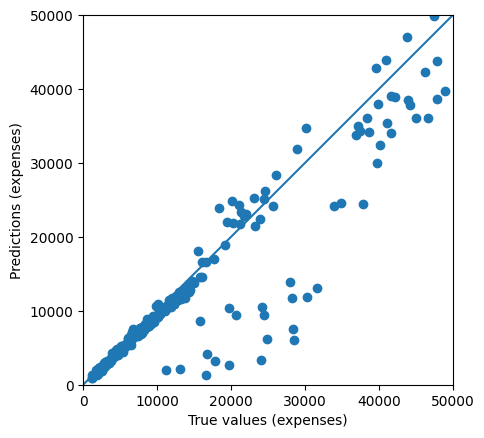

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
